In [24]:
# STA365 HW2
#Jordan Milando
#1006538873
#Part 1

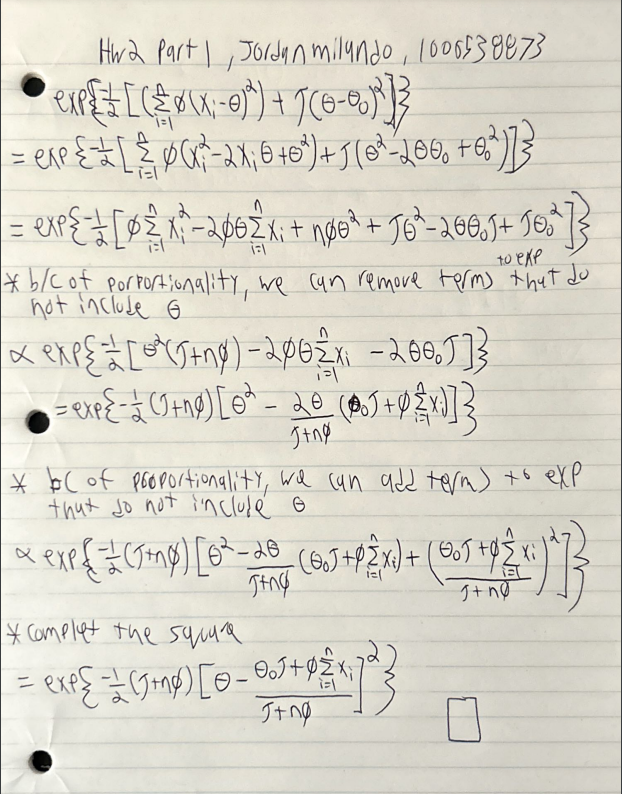

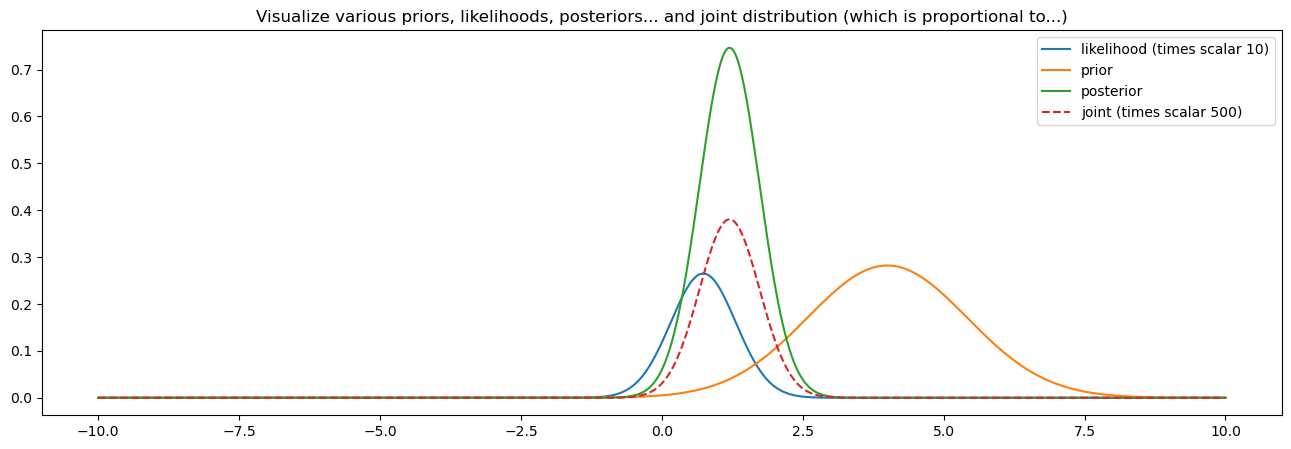

In [25]:
import numpy as np;
from scipy import stats;
import matplotlib.pyplot as plt

np.random.seed(2024)

n = 3;
x = stats.norm(loc=0,scale=1).rvs(n);
theta_0,tau = 4,1/2;
parameter_domain = np.linspace(-10,10,1001); 
likelihood = stats.norm.pdf((x[:,np.newaxis])*np.ones(parameter_domain.shape), 
                            loc=parameter_domain, scale=1).prod(axis=0) # sigma=1 known
prior = stats.norm(loc=theta_0, scale=1/tau**0.5).pdf(parameter_domain) # What if p(theta) = 1?
c,c2 = 500,10; 
joint = c*likelihood*prior # elementwise multiplication 
posterior = stats.norm(loc=(tau*theta_0+x.sum())/(tau+n),
                       scale=1/(tau+n)**0.5).pdf(parameter_domain)
plt.figure(figsize=(16,5));
plt.plot(parameter_domain, c2*likelihood,
         label="likelihood (times scalar "+str(c2)+")");
plt.plot(parameter_domain, prior, label="prior");
plt.plot(parameter_domain, posterior, label="posterior");
plt.plot(parameter_domain, joint, linestyle="--",
         label="joint (times scalar "+str(c)+")");
plt.legend();
plt.title("Visualize various priors, likelihoods, posteriors... and joint distribution (which is proportional to...)"); 

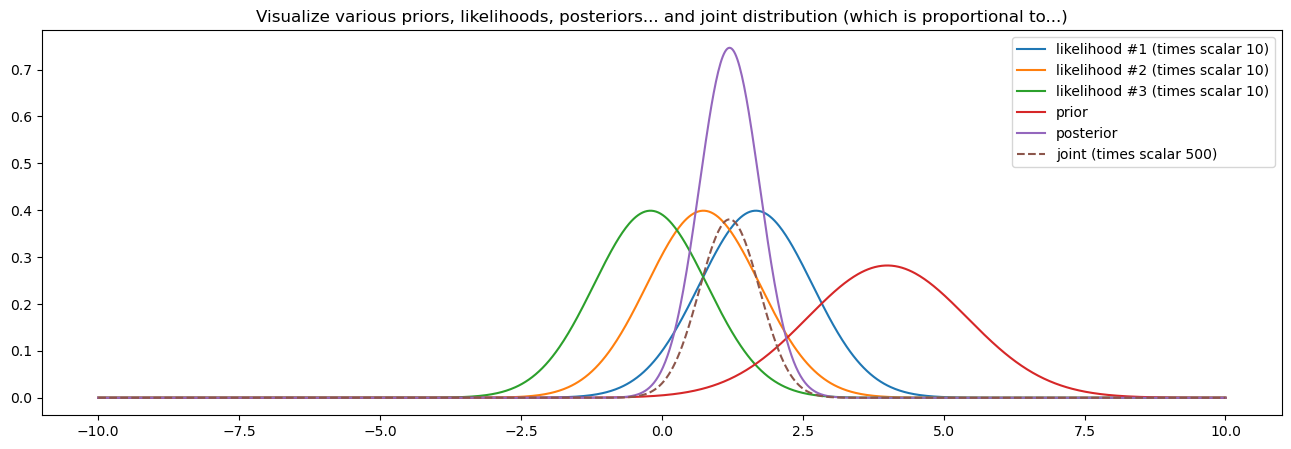

In [26]:
#Part 2
#Question 1

import numpy as np;
from scipy import stats;
import matplotlib.pyplot as plt

np.random.seed(2024)

n = 3;
x = stats.norm(loc=0,scale=1).rvs(n);
theta_0,tau = 4,1/2;
parameter_domain = np.linspace(-10,10,1001); 

likelihood1 = stats.norm.pdf((x[0]), 
                            loc=parameter_domain, scale=1) # sigma=1 known
likelihood2 = stats.norm.pdf((x[1]), 
                            loc=parameter_domain, scale=1) # sigma=1 known
likelihood3 = stats.norm.pdf((x[2]), 
                            loc=parameter_domain, scale=1) # sigma=1 known

prior = stats.norm(loc=theta_0, scale=1/tau**0.5).pdf(parameter_domain) # What if p(theta) = 1?
c,c2 = 500,10; 
joint = c*likelihood1*likelihood2*likelihood3*prior # elementwise multiplication 
posterior = stats.norm(loc=(tau*theta_0+x.sum())/(tau+n),
                       scale=1/(tau+n)**0.5).pdf(parameter_domain)

plt.figure(figsize=(16,5));
plt.plot(parameter_domain, likelihood1,
         label="likelihood #1 (times scalar "+str(c2)+")");
plt.plot(parameter_domain, likelihood2,
         label="likelihood #2 (times scalar "+str(c2)+")");
plt.plot(parameter_domain, likelihood3,
         label="likelihood #3 (times scalar "+str(c2)+")");
plt.plot(parameter_domain, prior, label="prior");
plt.plot(parameter_domain, posterior, label="posterior");
plt.plot(parameter_domain, joint, linestyle="--",
         label="joint (times scalar "+str(c)+")");
plt.legend();
plt.title("Visualize various priors, likelihoods, posteriors... and joint distribution (which is proportional to...)");

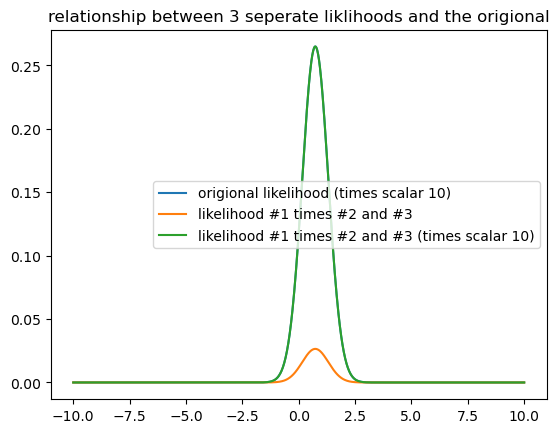

In [27]:
plt.plot(parameter_domain, c2*likelihood,
         label="origional likelihood (times scalar "+str(c2)+")");
plt.plot(parameter_domain, likelihood1*likelihood2*likelihood3,
         label="likelihood #1 times #2 and #3");
plt.plot(parameter_domain, likelihood1*likelihood2*likelihood3*c2,
         label="likelihood #1 times #2 and #3 (times scalar "+str(c2)+")");
plt.legend();
plt.title("relationship between 3 seperate liklihoods and the origional");


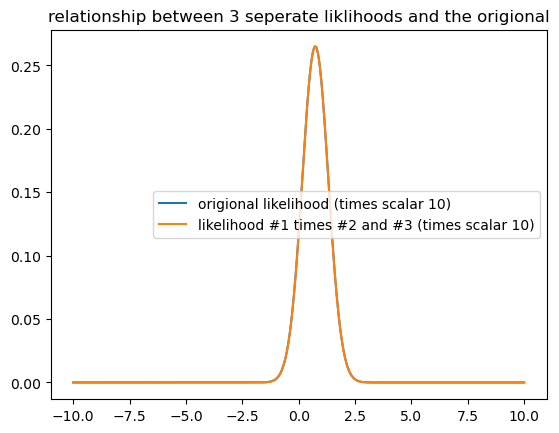

In [28]:
plt.plot(parameter_domain, c2*likelihood,
         label="origional likelihood (times scalar "+str(c2)+")");
plt.plot(parameter_domain, likelihood1*likelihood2*likelihood3*c2,
         label="likelihood #1 times #2 and #3 (times scalar "+str(c2)+")");
plt.legend();
plt.title("relationship between 3 seperate liklihoods and the origional");

#if only one distribution is shown then two are equal, which shows that the
#origional liklihood is equal to c2*likelihood1*likelihood2*likelihood3

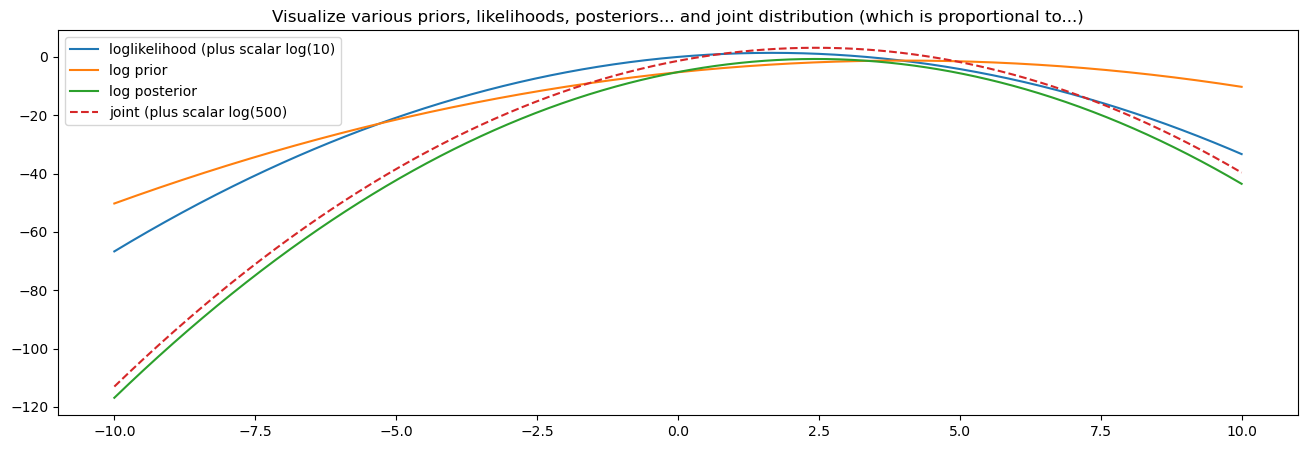

In [29]:
#Question 2

import numpy as np;
from scipy import stats;
import matplotlib.pyplot as plt

np.random.seed(2024)

n = 1;
x = stats.norm(loc=0,scale=1).rvs(n);
theta_0,tau = 4,1/2;
parameter_domain = np.linspace(-10,10,1001); 

likelihood = stats.norm.logpdf((x[:,np.newaxis])*np.ones(parameter_domain.shape), 
                            loc=parameter_domain, scale=1).prod(axis=0) # sigma=1 known
prior = stats.norm(loc=theta_0, scale=1/tau**0.5).logpdf(parameter_domain) # What if p(theta) = 1?
c,c2 = 500,10; 
joint = np.log(c) + likelihood + prior # elementwise multiplication becomes addition for log of joint
posterior = stats.norm(loc=(tau*theta_0+x.sum())/(tau+n),
                      scale=1/(tau+n)**0.5).logpdf(parameter_domain)

plt.figure(figsize=(16,5));
plt.plot(parameter_domain, np.log(c2) + likelihood,
         label="loglikelihood (plus scalar log("+str(c2)+")");
plt.plot(parameter_domain, prior, label="log prior");
plt.plot(parameter_domain, posterior, label="log posterior");
plt.plot(parameter_domain, joint, linestyle="--",
         label="joint (plus scalar log("+str(c)+")");
plt.legend();
plt.title("Visualize various priors, likelihoods, posteriors... and joint distribution (which is proportional to...)");

In [30]:
#Question 3
#A  𝑝(𝜇)∝1 prior for a normal likelihood is an improper prior but it does
#in fact produce a proper normal posterior in this specific case

In [ ]:
#Question 4
#log likelihoods and log posteriors differ from each other by the log of the
#marginal liklihood